# 한국어 언어 모델 학습 및 다중 과제 튜닝

* 단일 문장 분류를 task에 적용

## 1. KLUE 데이터셋 소개

### 1. KLUE 데이터셋

* 한국어 자연어 이해 벤치마크(Korean Language Understanding Evaluation, KLUE)
  * 대부분의 자연어 유형 task를 포함하고 있음
  * task 유형
    * 문장 분류
      * 단일 문장을 분류하는 대상으로 분류하는 task
    * 관계 추출
      * 단일 문장을 분류하는 대상으로 분류하는 task
    * 문장 유사도
      * 두 문장의 유사도가 어느정도인지 파악하는 task
      * chatbot 구현
    * 자연어 추론
      * 주어진 두 문장에 대한 관계를 분류하는 task
    * 개체명 인식
      * 문장 토큰 분류 task
    * 품사 태깅
      * 문장 토큰 분류 task
      * pos tagging
    * 질의 응답
      * 문장 토큰 분류 task
      * SQuAD dataset, KorQuAD 를 통해 본문에서 정답을 찾아냄
    * 목적형 대화
    * 의존 구문 분석

### 2. 의존 구문 분석

* 의존 구문 분석
  * 단어들 사이의 관계를 분석하는 task
  * 특징
    * 지배소 : 의미의 중심이 되는 요소
    * 의존소 : 지배소가 갖는 의미를 보완해주는 요소 (수식)
    * 어순과 생략이 자유로운 한국어와 같은 언어에서 주로 연구됨
  * 분류 규칙
    * 지배소는 후위언어. 지배소는 항상 의존소보다 뒤에 위치함
    * 각 의존소의 지배소는 하나
    * 교차 의존 구조는 없음

* ex.
  * 지배소 : 이순신, 의존소 : 충무공
  * 지배소 : 무신, 의존소 : 이순신

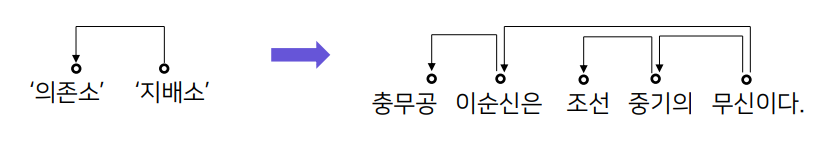

* 의존 구문 분석
  * 분류 방법
    * Sequence labeling 방식으로 처리 단계를 나눔
    * 앞 어절에 의존소가 없고 다음 어절이 지배소인 어절을 삭제하며 의존 관계를 만듬


    * ex. '충무공', '이순신은', '조선', '중기의', '무신이다.'에서 의존소 파악
      * '충무공'은 '이순신은'의 의존소, '조선'은 '중기의'의 의존소
      * 정의 끝나면 삭제
      * '이순신은', '중기의', '무신이다.'에서 의존소 파악
      * '이순신은'은 '무신이다.'의 의존소
      * 정의 끝나면 삭제
      * '중기의', '무신이다.'에서 의존소 파악
      * '중기의'는 '무신이다.'의 의존소
      * '무신이다.' 더 이상 관계 파악 불가

* 의존 구문 분석
  * 복잡한 자연어 형태를 그래프로 구조화해서 표형이 가능함
  * 각 대상(entity)에 대한 정보 추출이 가능함
    * '"나"는 "구름그림"을 그렸다.', '"구름그림"은 "새털구름"을 그린 것이다.' 정보 추출이 가능함

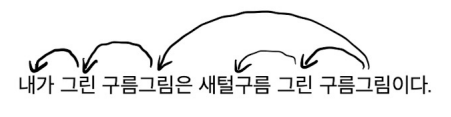

## 2. 단일 문장 분류 task 소개

### 1. 문장 분류 task

* 문장 분류 task
  * 주어진 문장이 어떤 종류의 범주에 속하는지를 구분하는 task

  * 감정분석(Sentiment Analysis)
    * 문장의 긍정 또는 부정 및 중립 등 성향을 분류하는 프로세스
    * 문장을 작성한 사람의 느낌, 감정 등을 분석할 수 있기 때문에 기업에서 모니터링, 고객지원, 또는 댓글에 대한 필터링 등을 자동화하는 작업에 주로 사용
    * 활용 방안
      * 혐오 발언 분류 : 댓글, 게임 대화 등 혐오 발언을 분류하여 조치를 취하는 용도로 활용
      * 기업 모니터링 : 소셜, 리뷰 등 데이터에 대해 기업 이미지, 브랜드 선호도, 제품평가 등 긍정 또는 부정적 요인을 분석

  * 주제 라벨링(Topic Labeling)
    * 문장의 내용을 이해하고 적절한에 분류하는 프로세스
    * 주제별로 뉴스 기사를 구성하는 등 데이터 구조화와 구성에 용이
    * 활용 방안
      * 대용량 문서 분류 : 대용량의 문서를 범주화
      * VoC(Voice of Customer) : 고객의 피드백을 제품 가격, 개선점, 디자인 등 적절한 주제로 분류하여 데이터를 구조화

* 문장 분류 task
  * 언어감지(Language Detection)
    * 문장이 어떤 나라 언어인지를 분류하는 프로세스
    * 주로 번역기에서 정확한 번역을 위해 입력 문장이 어떤 나라의 언어인지 타겟팅하는 작업이 가능함
    * 활용 방안
      * 번역기 : 번역할 문장에 대해 적절한 언어를 감지함
      * 데이터 필터링 : 타켓 언어 이외의 데이터는 필터링함

    * 의도 분류(Intent Classification)
      * 문장이 가진 의도를 분류하는 프로세스
      * 입력 문장이 질문, 불만, 명령 등 다양한 의도를 가질 수 있기 때문에 적절한 피드백을 줄 수 있는 곳으로 라우팅 작업이 가능함
      * 활용 방안
        * 챗봇 : 문장의 의도인 질문, 명령, 거절 등을 분석하고 적절한 답변을 주기 위해 활용됨
          * intent classificatoin을 부착하여 입력된 문장의 질문이 더떤 종류인지 intent를 분류하고, 각각의 intent에 알맞은 chatbot dialog를 태우는 방식으로 개발

### 2. 문장 분류를 위한 데이터

* Kor_hate
  * 혐오 표현에 대한 데이터
  * 특정 개인 또는 집단에 대한 공격적 문장
  * 무례, 공격적이거나 비꼬는 문장
  * 부정적이지 않은 문장

  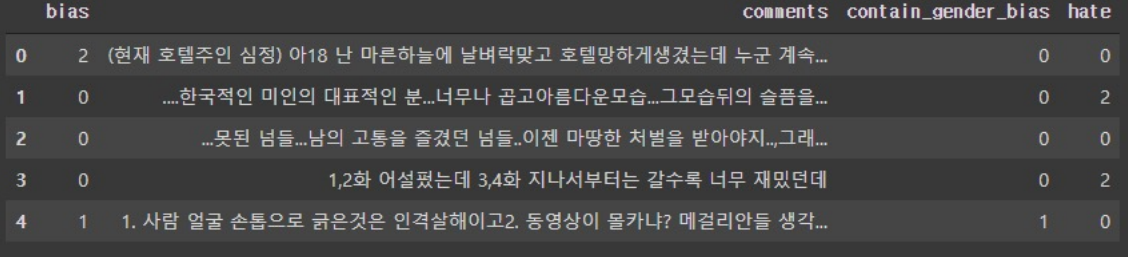

* Kor_sarcasm
  * 비꼬지 않은 표현의 문장
  * 비꼬는 표현의 문장

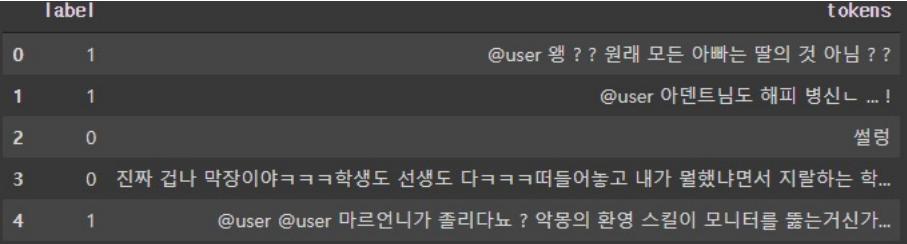

* Kor_sae
  * 예/아니오로 답변 가능한 질문
  * 대안 선택을 묻는 질문
  * Wh- 질문 (who, what, where, when, why, how)
  * 금지 명령
  * 요구 명령
  * 강한 요구 명령

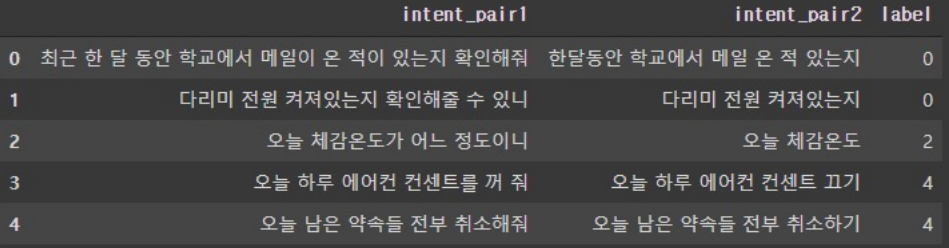



* Kor_3i4k
  * 단어 또는 문장 조각
  * 평서문
  * 질문
  * 명령문
  * 수사적 질문
  * 수사적 명령문
  * 억양에 의존하는 의도

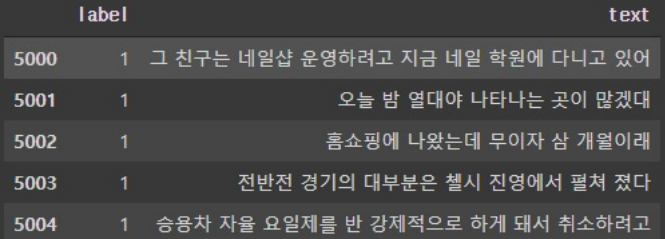

## 단일 문장 분류 모델 학습


* BERT [CLS] token의 vector를 classification하는 Dense layer 사용
  * [cls] token 위에 classification layer를 부착하여 문장의 긍정/부정 분류

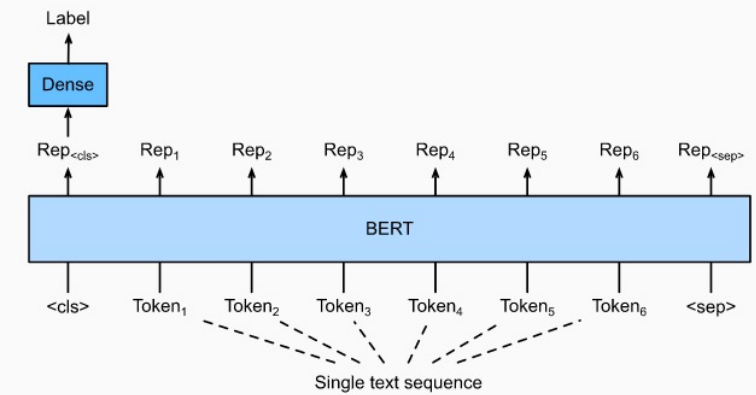

* 주요 매개변수
  * input_ids : sequence token을 입력
  * attention_mask : [0, 1]로 구성된 마스크, 패딩 토큰을 구분함
  * token_type_ids : [0, 1]로 구성됨, 입력의 첫 문장과 두번째 문장을 구분함
  * position_ids : 각 입력 시퀀스의 임베딩 인덱스
  * inputs_embeds : input_ids 대신 직접 임베딩 표현을 할당
  * labels : loss 계산을 위한 레이블
  * Next_sentence_label : 다음 문장 예측 loss 계산을 위한 레이블

### 2. 학습 과정

1. Dataset
2. 전처리 및 토큰화
3. Dataloader 설계
4. 기존의 Dataset을 train과 평가를 위한 dev로 나눔
5. Trainer 생성 및 training arguments 삽입
6. `train.train()`으로 학습

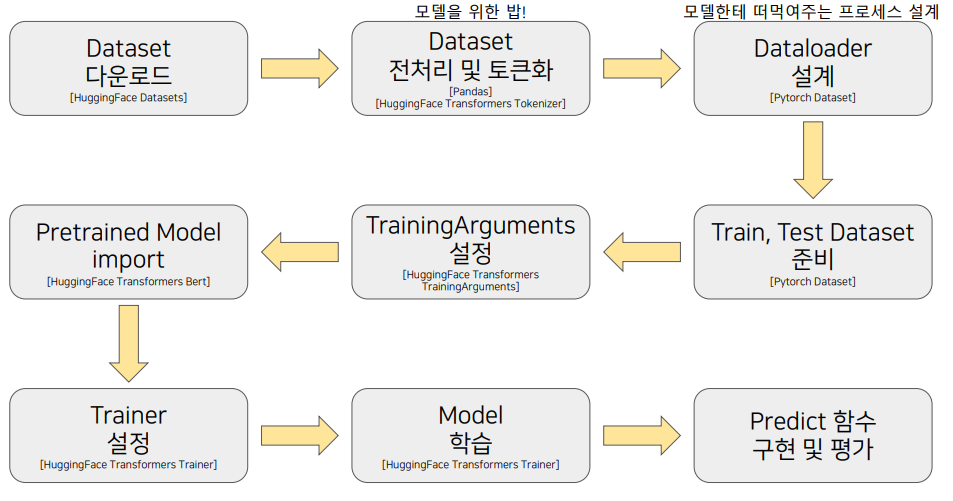